In [ ]:
#Import libraries 
import tweepy
from textblob import TextBlob
import pandas as pd 
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
pip install tweepy

In [ ]:
#Importing my access keys
api_key = #"putApikey here"
api_key_secret = #"put Apisecretkey here"
access_token = #"put access_token here"
access_token_secret = #"put access_token_secret here"

In [ ]:
#Creating the authentication object
auth = tweepy.OAuthHandler(api_key,api_key_secret)
#Setting the access token and the access token secret 
auth.set_access_token(access_token,access_token_secret)
#Creating the API object 
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#Gather 400 tweets about expo2020 and filter out any retweets 'RT'
search_term = '#Expo2020 ~filter:retweets'

In [51]:
#creating a cursor object 
tweets = tweepy.Cursor (api.search, q="#Expo2020",since = '2021-01-05', tweet_mode="extended").items(1000)
#Storing the tweets in a variable and getting the full text 
all_tweets = [tweet.full_text for tweet in tweets]

In [52]:
#At this point, am creating a dataframe to store the tweets with a column called 'Tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#Showing the first 5 rows of data 
df.head()

,Tweets
0,RT @KSAExpo2020: Don’t miss your chance to see...
1,RT @emoonstar101: #مساء_الخير من #Expo2020 #E...
2,RT @emoonstar101: #Expo2020 #Expo2020Dubai #ال...
3,"Enabling 50,000+ transactions per day for 16 m..."
4,RT @expo2020dubai: Today we are excited to cel...


In [53]:
#Creating a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#Expo','Expo', twt) #this line of code removes the '#' from Expo
  twt = re.sub('#expo','expo', twt) #this line of code removes the '#' from expo
  twt = re.sub('RT','', twt) #this line of code removes the '#' from expo
  twt = re.sub('#[A-Z a-z 0-9]+','', twt) #this line of code removes any string with a '#'
  twt = re.sub('\\n','', twt) #this line of code removes the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) #this line of code removes any hyperlinks 
  return twt

In [54]:
#Cleaning the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#Show the data set (Cleaned and uncleaned)
df.head(11)

,Tweets,Cleaned_Tweets
0,RT @KSAExpo2020: Don’t miss your chance to see...,@KSAExpo2020: Don’t miss your chance to see ’...
1,RT @emoonstar101: #مساء_الخير من #Expo2020 #E...,@emoonstar101: #مساء_الخير من Expo2020 Expo2...
2,RT @emoonstar101: #Expo2020 #Expo2020Dubai #ال...,@emoonstar101: Expo2020 Expo2020Dubai #الجناح...
3,"Enabling 50,000+ transactions per day for 16 m...","Enabling 50,000+ transactions per day for 16 m..."
4,RT @expo2020dubai: Today we are excited to cel...,@expo2020dubai: Today we are excited to celeb...
5,RT @expo2020dubai: It’s now or never before it...,@expo2020dubai: It’s now or never before it's...
6,RT @JPGaultier: Gathering and celebrating “Jea...,@JPGaultier: Gathering and celebrating “Jean ...
7,RT @expo2020dubai: Be amazed at the grace and ...,@expo2020dubai: Be amazed at the grace and at...
8,RT @expo2020dubai: Join us for the African Uni...,@expo2020dubai: Join us for the African Union...
9,RT @expo2020dubai: Expo 2020 Dubai is honoured...,@expo2020dubai: Expo 2020 Dubai is honoured t...


In [55]:
#Creating a function to get the subjectivity 
def getSubjectivitie(twt):
  return TextBlob(twt).sentiment.subjectivity
#Creating a function to get the polarity 
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity 

#Creating two columns called 'Subjectivity' & 'polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivitie)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,RT @KSAExpo2020: Don’t miss your chance to see...,@KSAExpo2020: Don’t miss your chance to see ’...,0.5875,0.250
1,RT @emoonstar101: #مساء_الخير من #Expo2020 #E...,@emoonstar101: #مساء_الخير من Expo2020 Expo2...,0.0000,0.000
2,RT @emoonstar101: #Expo2020 #Expo2020Dubai #ال...,@emoonstar101: Expo2020 Expo2020Dubai #الجناح...,0.0000,0.000
3,"Enabling 50,000+ transactions per day for 16 m...","Enabling 50,000+ transactions per day for 16 m...",0.0000,0.000
4,RT @expo2020dubai: Today we are excited to cel...,@expo2020dubai: Today we are excited to celeb...,0.2500,0.125


In [56]:
#Creating a function to get the text sentiment 
def getSentiment(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [60]:
#Create a column to store the text sentiment 
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data 
df.head(10)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,RT @KSAExpo2020: Don’t miss your chance to see...,@KSAExpo2020: Don’t miss your chance to see ’...,0.5875,0.250,Positive
1,RT @emoonstar101: #مساء_الخير من #Expo2020 #E...,@emoonstar101: #مساء_الخير من Expo2020 Expo2...,0.0000,0.000,Neutral
2,RT @emoonstar101: #Expo2020 #Expo2020Dubai #ال...,@emoonstar101: Expo2020 Expo2020Dubai #الجناح...,0.0000,0.000,Neutral
3,"Enabling 50,000+ transactions per day for 16 m...","Enabling 50,000+ transactions per day for 16 m...",0.0000,0.000,Neutral
4,RT @expo2020dubai: Today we are excited to cel...,@expo2020dubai: Today we are excited to celeb...,0.2500,0.125,Positive
5,RT @expo2020dubai: It’s now or never before it...,@expo2020dubai: It’s now or never before it's...,0.0000,0.000,Neutral
6,RT @JPGaultier: Gathering and celebrating “Jea...,@JPGaultier: Gathering and celebrating “Jean ...,0.0000,0.000,Neutral
7,RT @expo2020dubai: Be amazed at the grace and ...,@expo2020dubai: Be amazed at the grace and at...,0.0000,0.000,Neutral
8,RT @expo2020dubai: Join us for the African Uni...,@expo2020dubai: Join us for the African Union...,0.0000,0.000,Neutral
9,RT @expo2020dubai: Expo 2020 Dubai is honoured...,@expo2020dubai: Expo 2020 Dubai is honoured t...,0.0000,0.000,Neutral


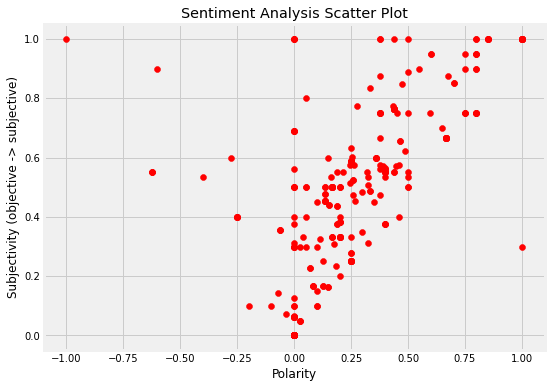

In [58]:
#Creating a scatter plot to show the subjectivity and polarity 
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'] [i], color='Red')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()

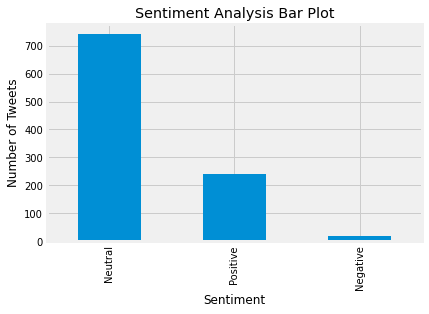

In [59]:
#Create  bar chart to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()